In [70]:
import pandas as pd
import spacy
import ast
import re
from pprint import pprint
import json
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn import linear_model
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import sparse
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['music', 'app',u'music', u'app',u'like',u'ad', u'let', u'add', u'team', u'able',u'library', u'hear', u'thing', u'really', u'continue', u'job', u'everyday', u'basic', u'choice', u'lil', u'month', u'save', u'come', u'ever', u'guy', u'keep', u'wifi', u'sometimes', u'artist', u'selection', u'choose', u'always', u'nothing', u'tablet', u'range', u'know', u'follow', u'daily', u'overall', u'give', u'totally', u'life', u'anything', u'everything', u'never', u'spotify', u'think', u'also', u'many', u'stuff', u'second', u'could', u'try', u'still', u'must', u'need', u'away', u'day', u'bit', u'number', u'make',u'year', u'lot', u'time',u'buy', u'song', u'even', u'minute', u'phone', u'gemitin', u'basta', u'say', u'everyone', u'service', u'take', u'bottom', u'panget', u'otherwise', u'yet', u'put', u'much', u'far', u'thank',  u'-PRON-', u'go', u'play',u'app', u'from', u'subject', u're', u'edu', u'use',  u'album', u'get', u'would', u'already',u'xe',u'vez', u'include', u'litt', u'sort', u'dayu', u'nice', u'dont', u'i', u'want', u'that'])

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import warnings




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yubozhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:

reviews = []
with open('scraped_reviews_spotify 2.txt', 'r') as f: #, encoding='utf-8'
    reviews = f.read()

reviews = re.sub('\]', '', reviews)
reviews = re.sub('\[', '', reviews)
reviews = re.sub('\n', '', reviews)
reviews = re.sub("'", '"', reviews)
reviews = re.sub('    ', ' ', reviews)
reviews = re.sub(' {', '{', reviews)
reviews = re.sub(' }', '}', reviews)
reviews = re.sub('{ ', '{', reviews)
reviews = re.sub('} ', '}', reviews)
reviews = re.sub('}  {', '}, {', reviews)
reviews = re.sub('}{', '}, {', reviews)
reviews = re.sub('id:', '"id":', reviews)
reviews = re.sub('userName:', '"userName":', reviews)
reviews = re.sub('userImage:', '"userImage":', reviews)
reviews = re.sub('date:', '"date":', reviews)
reviews = re.sub('url:', '"url":', reviews)
reviews = re.sub('score:', '"score":', reviews)
reviews = re.sub('title:', '"title":', reviews)
reviews = re.sub('text:', '"text":', reviews)
reviews = re.sub('replyDate:', '"replyDate":', reviews)
reviews = re.sub('replyText:', '"replyText":', reviews)
reviews = re.sub(': undefined', ': "undefined"', reviews)

In [72]:
review_strings = [r+'}' for r in reviews.split('},')]
review_strings[-1] = review_strings[-1][:-1]
review_list = []
for r in review_strings:
    try:
        review_list.append(json.loads(r))
    except:
        pass
    
def remove_stopwords(texts, stop_words):
    corp=[]
    for doc in texts:
        fix_doc=[]
        for word in doc:
            if word not in stop_words:
                fix_doc.append(word)
        corp.append(fix_doc)
    return corp
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        if sent != []:
            doc = nlp(" ".join(sent)) 

            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
 
    return texts_out

In [73]:
review_list_s = []
for i in range(len(review_list)): 

    review_list_s.append(review_list[i])
    

   
    raw_corpus = []

    for i in range(len(review_list_s)): # change to larger number
        raw_corpus.append(review_list_s[i][u'text'].encode('ascii',errors='ignore'))
    data = raw_corpus
    # Remove Emails
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]
    data = [re.sub("\"", "", sent) for sent in data]
    data = [re.sub("_", "", sent) for sent in data]
    #line=line.decode('utf-8','ignore').encode("utf-8")
    
    raw_scores = []
    for i in range(len(review_list)): # change to larger number
        raw_scores.append(review_list[i][u'score'])
 
 

In [74]:
# To Do
# synopses is you curent data
# title is useless here

titles = []
for i in range(len(data)):
    titles.append(str(i))
synopses = data

In [75]:
titles[:10]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [76]:
print synopses[0][:200]

SyntaxError: invalid syntax (<ipython-input-76-6a792639ef18>, line 1)

In [ ]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
print stopwords[:10]

In [ ]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    #print(filtered_tokens)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [84]:
def remove_stopwords(doc, stop_words):

    fix_doc=[]
    for word in doc:
        if word not in stop_words:
            fix_doc.append(word)

    return fix_doc
sips=[]
coun=0
ranks_new=[]
for i in synopses:
    tokens = [word.lower() for sent in nltk.sent_tokenize(i) for word in nltk.word_tokenize(sent)]
    filtered_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    tokens=remove_stopwords(filtered_tokens, stop_words)
    f=""
    kk=0
    for t in tokens:
        kk=kk+1
        if kk==1:
            f=t
        else:
            f=t+" "+f

    if len(f)>10:
        sips.append(f)
        ranks_new.append(ranks[coun])
synopses= sips
print(synopses)
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
  
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

['projects application reliable', 'soon version lighter load.expecting', 'opening shows works update latest', 'charm works', 'complicated functionality ui', 'useful best', 'conversation included sure way great touch stay easy desktop perfectly integrates love', 'company communication favorite', 'engage pressured feeling without real connected feel makes', 'point slack without run company great', 'reinstall requiring freezes permanently reminders view clicking great', 'companies big experience organisations small teams communications good', 'invest thats wallet etc', 'free words good', 'messages function copy didnt', 'communicator great', 'cross-platforms features ux consistent tool awesome', 'good pretty', 'interface attractive great looks valley silicon featured came', 'phones galaxy worst seems consistent notifications timely', 'slack thanks brilliant events massive option check-in videos choreography files script large send slack used weve communication nuanced allow level another t

In [85]:
print(len(totalvocab_stemmed))
print(len(totalvocab_tokenized))

3715
3715


In [86]:
totalvocab_stemmed

[u'project',
 u'applic',
 u'reliabl',
 u'soon',
 u'version',
 u'lighter',
 u'load.expect',
 u'open',
 u'show',
 u'work',
 u'updat',
 u'latest',
 u'charm',
 u'work',
 u'complic',
 u'function',
 'ui',
 u'use',
 u'best',
 u'convers',
 u'includ',
 u'sure',
 u'way',
 u'great',
 u'touch',
 u'stay',
 u'easi',
 u'desktop',
 u'perfect',
 u'integr',
 u'love',
 u'compani',
 u'communic',
 u'favorit',
 u'engag',
 u'pressur',
 u'feel',
 u'without',
 u'real',
 u'connect',
 u'feel',
 u'make',
 u'point',
 u'slack',
 u'without',
 u'run',
 u'compani',
 u'great',
 u'reinstal',
 u'requir',
 u'freez',
 u'perman',
 u'remind',
 u'view',
 u'click',
 u'great',
 u'compani',
 u'big',
 u'experi',
 u'organis',
 u'small',
 u'team',
 u'communic',
 u'good',
 u'invest',
 u'that',
 u'wallet',
 u'etc',
 u'free',
 u'word',
 u'good',
 u'messag',
 u'function',
 u'copi',
 u'didnt',
 u'communic',
 u'great',
 u'cross-platform',
 u'featur',
 'ux',
 u'consist',
 u'tool',
 u'awesom',
 u'good',
 u'pretti',
 u'interfac',
 u'attract

In [87]:

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3715 items in vocab_frame


In [88]:
print(vocab_frame.head())

               words
project     projects
applic   application
reliabl     reliable
soon            soon
version      version


In [89]:
tokenize_and_stem

<function __main__.tokenize_and_stem>

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 299 ms, sys: 7.02 ms, total: 306 ms
Wall time: 307 ms
(590, 11)


In [91]:
terms = tfidf_vectorizer.get_feature_names()

In [92]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


In [93]:
ranks = raw_scores


In [94]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 124 ms, sys: 3.9 ms, total: 128 ms
Wall time: 128 ms


In [95]:
len(synopses)

590

In [96]:
titles=range(len(synopses))
ranks=range(len(synopses))
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters }

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster'])

In [97]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: good, songs, listen, great, playlists, premium,

Cluster 0 titles: 11, 13, 17, 26, 40, 45, 46, 47, 48, 60, 63, 93, 99, 102, 108, 114, 122, 130, 144, 150, 171, 176, 186, 187, 192, 198, 214, 218, 219, 223, 224, 229, 232, 240, 242, 272, 291, 294, 312, 314, 328, 341, 344, 370, 372, 377, 382, 410, 423, 428, 433, 459, 460, 478, 485, 504, 512, 523, 537, 541, 565, 581, 588,

Cluster 1 words: great, premium, love, songs, playlists, works,

Cluster 1 titles: 6, 9, 10, 15, 18, 21, 24, 25, 29, 64, 85, 107, 109, 115, 123, 124, 128, 137, 149, 152, 181, 185, 189, 194, 196, 200, 205, 206, 209, 216, 220, 221, 227, 233, 234, 247, 277, 283, 299, 309, 311, 315, 319, 320, 322, 339, 348, 362, 363, 366, 367, 376, 379, 389, 393, 403, 411, 413, 416, 421, 427, 430, 438, 442, 443, 446, 452, 466, 481, 517, 519, 528, 530, 533, 538, 546, 547, 568, 586,

Cluster 2 words: listen, songs, playlists, love, great, works,

Cluster 2 titles: 58, 66, 71, 75, 90, 112, 117, 121, 132, 1

In [64]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'A', 
                 1: 'B', 
                 2: 'C', 
                 3: 'E', 
                 4: 'F'}

In [65]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

/Users/yubozhang/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


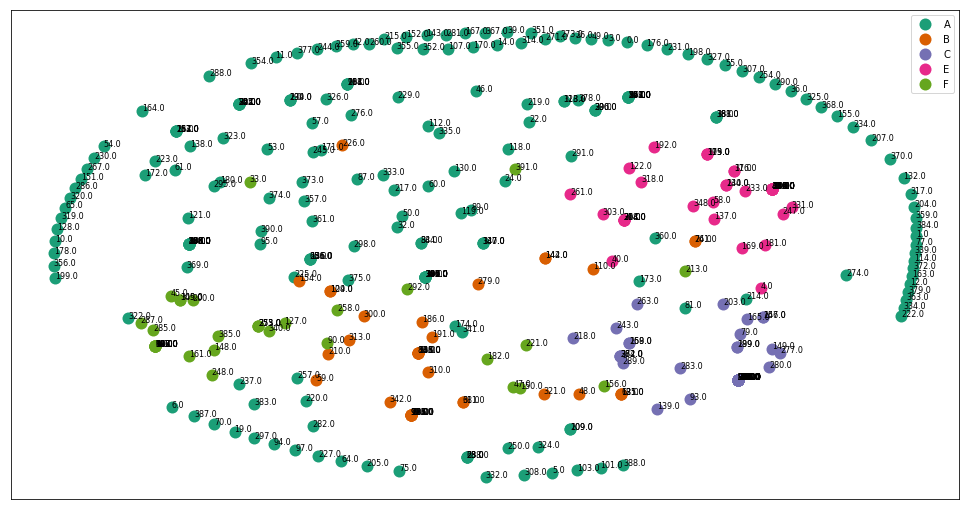

In [66]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)